## Motivation
To be honest, I was a bit out of my wheelhouse when reading "Exponential Time Differencing for Stiff Systems" by Cox and Matthews. I should build some fundamentals first lol.

## Spectral Derivatives and FFT
Recall the Fast Fourier Transform algorithm that can compute the Fourier Transform of a function based on a sample of a points (aka Discrete Fourier Transform).

The Fourier Transform of a continuous function $f(x)$ is defined below
$$
  F\{f\}(k) = \hat{f}(k) = \int_{-\infty}^{\infty}f(x)e^{-ikx}dx
$$
Intuitvely, we are translating our inputs in time/space to frequency, re-building our function out of a series of waves.

On a computer, we can only store discrete points that compose our function. Suppose we have $N$ equally spaced out samples of $f(x)$
$$
x_j = \frac{2\pi j}{N}, j = 0,...,N-1
$$

The DFT is

$$
\hat{f}_k = \sum_{j=0}^{N-1} f_j\, e^{-2\pi i j k / N},
\qquad k = 0,\dots ,N-1
$$

## But how does this relate to derivatives?
The continuous fourier transform has an interesting property
$$
F(\frac{df}{dx}) = ikF(f)
$$
If we let $\text{fft}$ be our FFT and $\text{ifft}$ be the inverse FFT we find that after applying this property to our DFT we get
$$
f'(x_j) = \text{ifft}(ik \cdot \text{fft}(f_j)
$$

*But why would we ever need this? Are FDMs not enough?*
It turns out that its very useful for manipulating complex PDEs like the KS equation, and compared to finite difference methods the error gets smaller as the samples grow.

Let's get to coding!


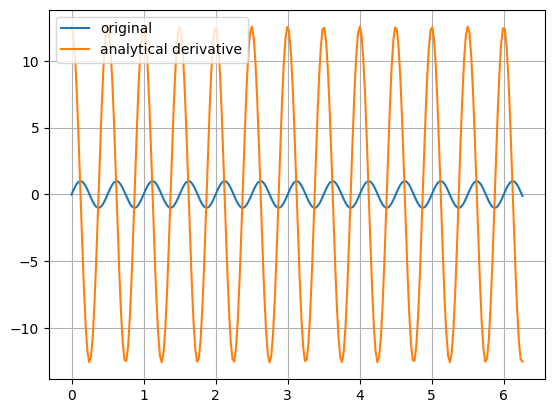

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#
L = 2 * np.pi
N = 256
mesh = np.linspace(0,L,N, endpoint=False)

def f(x):
  return np.sin(4 * np.pi * x)

def f_prime(x):
  return 4 * np.pi * np.cos(4 * np.pi * x)

f_h = f(mesh)
f_prime_h = f_prime(mesh)

plt.plot(mesh, f_h, label="original")
plt.plot(mesh, f_prime_h, label="analytical derivative")
plt.grid()
plt.legend()

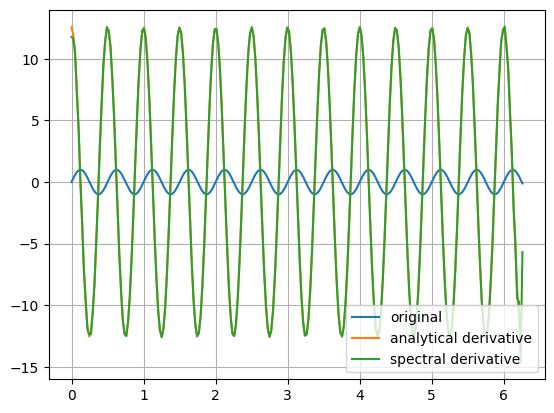

In [13]:
k = np.fft.fftfreq(N, d=L/(N * 2 * np.pi))
f_prime_fft_h = np.fft.ifft(1j * k * np.fft.fft(f_h)).real

plt.plot(mesh, f_h, label="original")
plt.plot(mesh, f_prime_h, label="analytical derivative")
plt.plot(mesh, f_prime_fft_h, label="spectral derivative")
plt.grid()
plt.legend()